## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [5]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamppath = Path('./Resources/bitstamp.csv')
bitstamp = pd.read_csv(bitstamppath, index_col= "Timestamp", parse_dates= True, infer_datetime_format= True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [7]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13681.04  13681.04  13637.93  $13646.48    3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  $13658.75    2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  $13610.22    0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  $13639.09    7.182986   
2018-01-01 00:04:00  13635.35  13636.35  13620.00   $13620.0    1.069665   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  45482.128785    13639.647479  
2018-01-01 00:01:00  36361.390888    13653.332816  
2018-01-01 00:02:00   1152.144036    13610.136247  
2018-01-01 00:03:00  97856.416478    13623.361128  
2018-01-01 00:04:00  14582.660932    13632.923329

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [9]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
coinbasepath = Path('./Resources/coinbase.csv')
coinbase = pd.read_csv(coinbasepath, index_col= "Timestamp", parse_dates= True, infer_datetime_format= True)

In [10]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  283451.08537    13619.105106  
2018-01-01 00:01:00  183283.97801    13602.426919  
2018-01-01 00:02:00  156789.19686    13590.872506  
2018-01-01 00:03:00  221413.64182    13560.332806  
2018-01-01 00:04:00  135141.26944    13574.719401

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [12]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna()

Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13681.04  13681.04  13637.93  $13646.48    3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  $13658.75    2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  $13610.22    0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  $13639.09    7.182986   
2018-01-01 00:04:00  13635.35  13636.35  13620.00   $13620.0    1.069665   
...                       ...       ...       ...        ...         ...   
2018-03-31 23:55:00   6935.01   6939.07   6922.56   $6922.56    1.044354   
2018-03-31 23:56:00   6922.02   6922.02   6918.00   $6920.32    3.069539   
2018-03-31 23:57:00   6920.33   6936.42   6920.33   $6934.72   28.239049   
2018-03-31 23:58:00   6927.65   6929.42   6927.65   $6927.65    0.839507   
2018-03-31 23:59:00   6929.98   6929.98   6928.00   $6928.01    0.209363   

                        USD Volume  Weighted Price  
Timestamp                                           
2018-01-01 00:00:00   45482.128785    13639.647479  
2018-01-01 00:01:00   36361.390888    13653.332816  
2018-01-01 00:02:00    1152.144036    13610.136247  
2018-01-01 00:03:00   97856.416478    13623.361128  
2018-01-01 00:04:00   14582.660932    13632.923329  
...                            ...             ...  
2018-03-31 23:55:00    7240.034602     6932.550078  
2018-03-31 23:56:00   21245.076275     6921.260233  
2018-03-31 23:57:00  195789.408220     6933.286106  
2018-03-31 23:58:00    5817.007705     6929.080007  
2018-03-31 23:59:00    1450.735763     6929.289993  

[129067 rows x 7 columns]

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [17]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace('$','')

C:\Users\Anthony\anaconda333\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [21]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype(float)


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [22]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()
# your phone left the call
# delete the period at the beginning
# then call the method .drop_duplicates()

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [23]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.dropna()

Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   
...                       ...       ...       ...        ...         ...   
2018-03-31 23:55:00   6945.20   6948.06   6930.00    $6930.0    5.802288   
2018-03-31 23:56:00   6930.00   6930.01   6930.00   $6930.01    0.625053   
2018-03-31 23:57:00   6930.01   6933.91   6930.01   $6933.91    0.776431   
2018-03-31 23:58:00   6933.91   6938.00   6933.90   $6937.31    0.133413   
2018-03-31 23:59:00   6937.30   6937.30   6931.09    $6934.0    1.012720   

                        USD Volume  Weighted Price  
Timestamp                                           
2018-01-01 00:00:00  283451.085370    13619.105106  
2018-01-01 00:01:00  183283.978010    13602.426919  
2018-01-01 00:02:00  156789.196860    13590.872506  
2018-01-01 00:03:00  221413.641820    13560.332806  
2018-01-01 00:04:00  135141.269440    13574.719401  
...                            ...             ...  
2018-03-31 23:55:00   40243.918480     6935.869979  
2018-03-31 23:56:00    4331.620701     6930.005567  
2018-03-31 23:57:00    5382.532162     6932.405747  
2018-03-31 23:58:00     925.356547     6936.048538  
2018-03-31 23:59:00    7022.275088     6934.070316  

[129322 rows x 7 columns]

In [24]:
coinbase['Close'] = coinbase['Close'].str.replace('$','')

C:\Users\Anthony\anaconda333\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [26]:
coinbase['Close'] = coinbase['Close'].astype(float)

In [27]:
coinbase = coinbase.drop_duplicates()

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [28]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]
# the closed is the 3rd index

# Review the first five rows of the DataFrame
bitstamp.head()

Open      High       Low     Close  BTC Volume  \
Timestamp                                                                 
2018-01-01 00:00:00  13681.04  13681.04  13637.93  13646.48    3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  13658.75    2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  13610.22    0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  13639.09    7.182986   
2018-01-01 00:04:00  13635.35  13636.35  13620.00  13620.00    1.069665   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  45482.128785    13639.647479  
2018-01-01 00:01:00  36361.390888    13653.332816  
2018-01-01 00:02:00   1152.144036    13610.136247  
2018-01-01 00:03:00  97856.416478    13623.361128  
2018-01-01 00:04:00  14582.660932    13632.923329

In [29]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase.head()

Open      High       Low     Close  BTC Volume  \
Timestamp                                                                 
2018-01-01 00:00:00  13620.00  13620.00  13608.49  13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00  13580.00   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  13583.44    9.955364   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  283451.08537    13619.105106  
2018-01-01 00:01:00  183283.97801    13602.426919  
2018-01-01 00:02:00  156789.19686    13590.872506  
2018-01-01 00:03:00  221413.64182    13560.332806  
2018-01-01 00:04:00  135141.26944    13574.719401

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [30]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

Open           High            Low          Close  \
count  129067.000000  129067.000000  129067.000000  129067.000000   
mean    10459.993683   10472.970114   10446.214703   10459.842453   
std      2315.909269    2318.929342    2312.331601    2315.976088   
min      5945.950000    5975.060000    5920.720000    5944.000000   
25%      8613.985000    8621.655000    8604.440000    8613.370000   
50%     10145.300000   10156.410000   10131.740000   10145.950000   
75%     11444.455000   11453.990000   11431.970000   11444.810000   
max     17234.980000   17234.990000   17214.960000   17234.980000   

          BTC Volume    USD Volume  Weighted Price  
count  129067.000000  1.290670e+05   129067.000000  
mean       11.792878  1.177496e+05    10459.384448  
std        21.799938  2.070551e+05     2315.723480  
min         0.000039  3.333436e-01     5949.997212  
25%         1.711874  1.773244e+04     8613.587020  
50%         4.994095  5.188050e+04    10144.740411  
75%        12.717950  1.313104e+05    11443.791560  
max       580.646391  5.483271e+06    17227.810502

In [31]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

Open           High            Low          Close  \
count  129322.000000  129322.000000  129322.000000  129322.000000   
mean    10449.213185   10456.118514   10441.872248   10449.140958   
std      2317.194653    2317.710389    2316.570594    2317.197419   
min      5882.300000    5907.280000    5873.000000    5882.310000   
25%      8609.230000    8613.872500    8603.505000    8609.230000   
50%     10137.440000   10145.900000   10127.880000   10137.440000   
75%     11397.522500   11400.000000   11390.000000   11397.237500   
max     17178.000000   17178.000000   17177.990000   17177.990000   

          BTC Volume    USD Volume  Weighted Price  
count  129322.000000  1.293220e+05   129322.000000  
mean       15.666556  1.572565e+05    10448.964130  
std        27.481647  2.667879e+05     2317.167139  
min         0.000442  6.699174e+00     5883.394912  
25%         2.999125  3.071222e+04     8609.135020  
50%         7.092572  7.461366e+04    10136.035004  
75%        16.954279  1.754530e+05    11396.970843  
max       959.084903  1.152334e+07    17177.995495

<AxesSubplot:title={'center':'Bitstamps Overlay 2018'}, xlabel='Timestamp'>

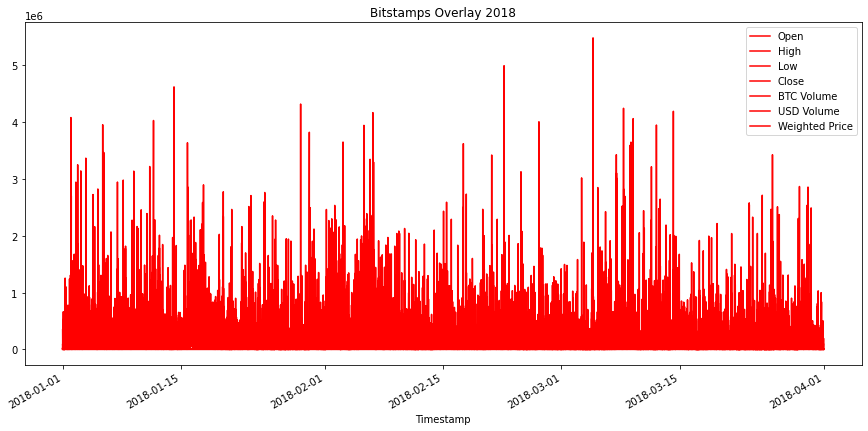

In [48]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp.plot(legend=True, figsize=(15, 7), title="Bitstamps Overlay 2018",color="red", label="Bitstamp Exchange")

<AxesSubplot:title={'center':'Coinbase Overlay 2018'}, xlabel='Timestamp'>

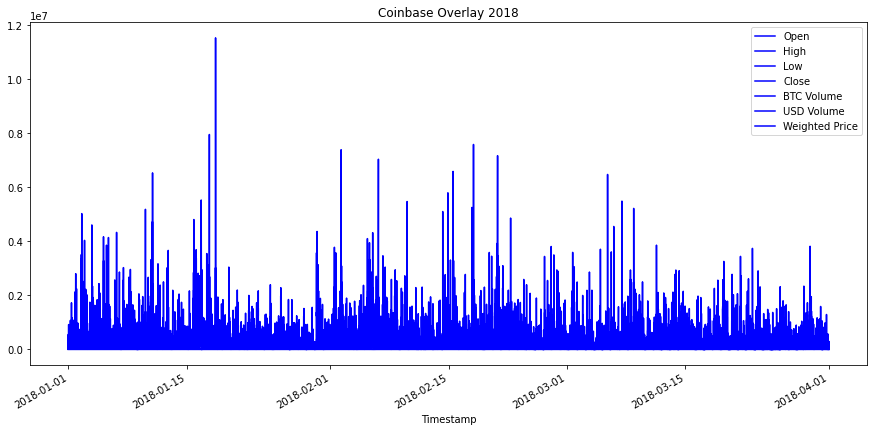

In [49]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase.plot(legend=True, figsize=(15, 7), title="Coinbase Overlay 2018",color="blue", label="Bitstamp Exchange")

In [51]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Closed'].plot(legend=True, figsize=(15, 7), title="Bitstamps Overlay",color="red", label="Bitstamp Exchange")
coinbase_sliced['Closed'].plot(legend=True, figsize=(15, 7),title="Coinbase Overlay",color="blue", label="Coinbase Exchange")

KeyError: 'Closed'

<AxesSubplot:title={'center':'Coinbase Overlay'}, xlabel='Timestamp'>

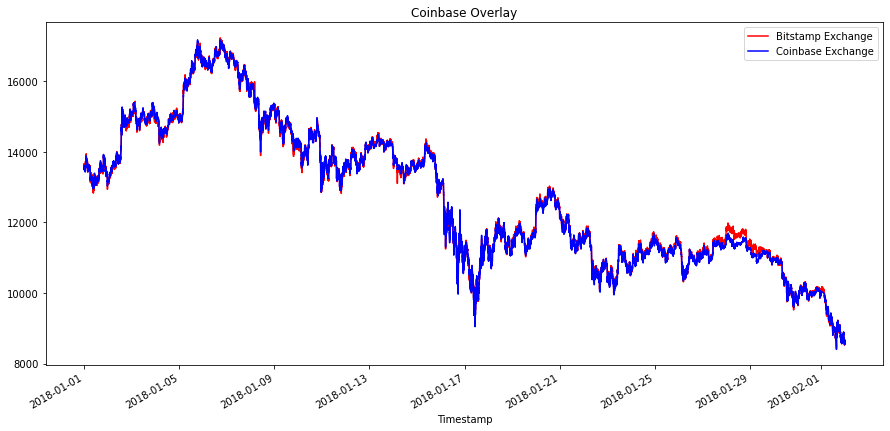

In [56]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15, 7), title="Bitstamps Overlay 2018",color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15, 7),title="Coinbase Overlay",color="blue", label="Coinbase Exchange")

<AxesSubplot:title={'center':'Coinbase Overlay'}, xlabel='Timestamp'>

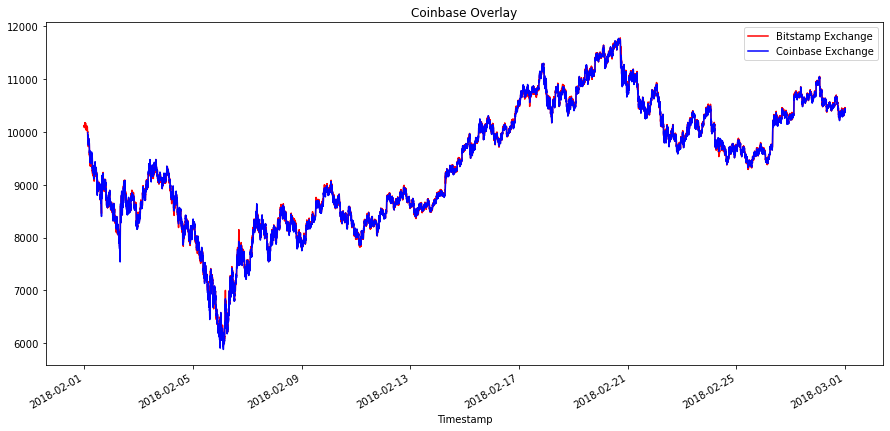

In [55]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced['Close'].loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15, 7), title="Bitstamps Overlay 2018",color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15, 7),title="Coinbase Overlay",color="blue", label="Coinbase Exchange")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Coinbase Overlay'}, xlabel='Timestamp'>

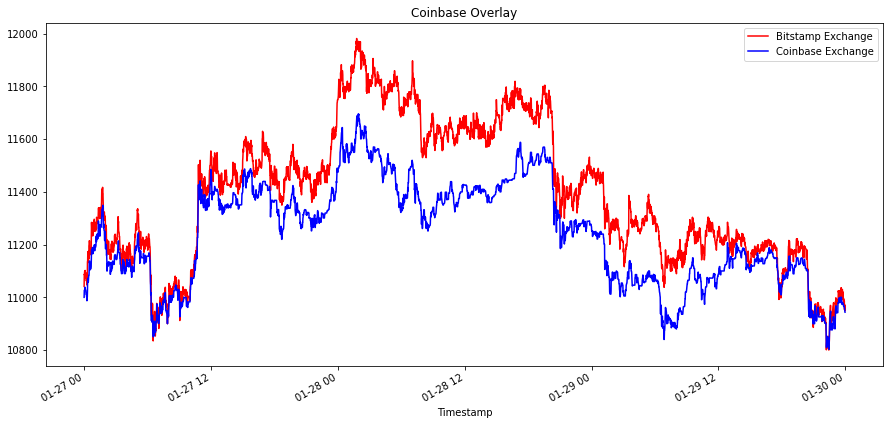

In [54]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-01-27':'2018-01-29'].plot(legend=True, figsize=(15, 7), title="Bitstamps Overlay 2018",color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc['2018-01-27':'2018-01-29'].plot(legend=True, figsize=(15, 7),title="Coinbase Overlay",color="blue", label="Coinbase Exchange")

In [46]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_spread_early = bitstamp_sliced['Close'].loc['2018-01-27':'2018-01-29']
coinbase_spread_early = coinbase_sliced['Close'].loc['2018-01-27':'2018-01-29']
arbitrage_spread_early = bitstamp_spread_early - coinbase_spread_early

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    4287.000000
mean      151.049606
std        98.868963
min       -48.010000
25%        59.660000
50%       147.120000
75%       229.910000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Analysis January 28 2018'}>

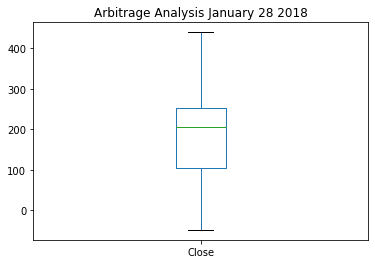

In [47]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early = bitstamp_sliced['Close'].loc ["2018-01-28":"2018-01-29"] - coinbase_sliced['Close'].loc ["2018-01-28":"2018-01-29"]
arbitrage_spread_early.plot(kind="box", title="Arbitrage Analysis January 28 2018")

<AxesSubplot:title={'center':'Coinbase Overlay'}, xlabel='Timestamp'>

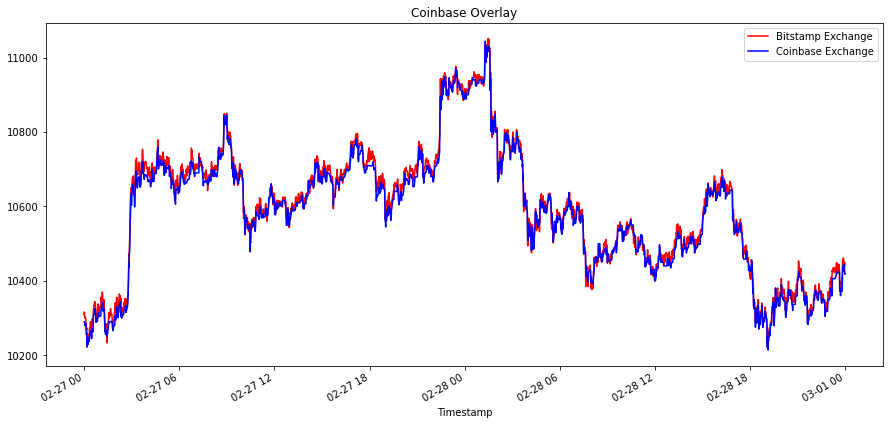

In [57]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc["2018-02-27":"2018-02-28"].plot(legend=True, figsize=(15, 7), title="Bitstamps and Coinbase Overlay 2018",color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc["2018-02-27":"2018-02-28"].plot(legend=True, figsize=(15, 7),title="Coinbase Overlay",color="blue", label="Coinbase Exchange")

In [58]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_spread_middle = bitstamp_sliced['Close'].loc["2018-02-27":"2018-02-28"]
coinbase_spread_middle = coinbase_sliced['Close'].loc["2018-02-27":"2018-02-28"]
arbitrage_spread_middle = bitstamp_spread_middle - coinbase_spread_middle

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    2865.000000
mean       11.013250
std        11.494751
min       -35.030000
25%         3.850000
50%        11.050000
75%        18.790000
max        51.550000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Analysis February 27 2018'}>

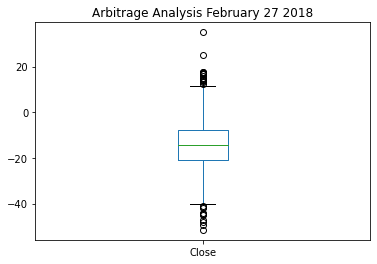

In [59]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle = coinbase_sliced['Close'].loc["2018-02-27"] - bitstamp_sliced['Close'].loc["2018-02-27"]
arbitrage_spread_middle.plot(kind="box",title="Arbitrage Analysis February 27 2018")

<AxesSubplot:title={'center':'Coinbase Overlay'}, xlabel='Timestamp'>

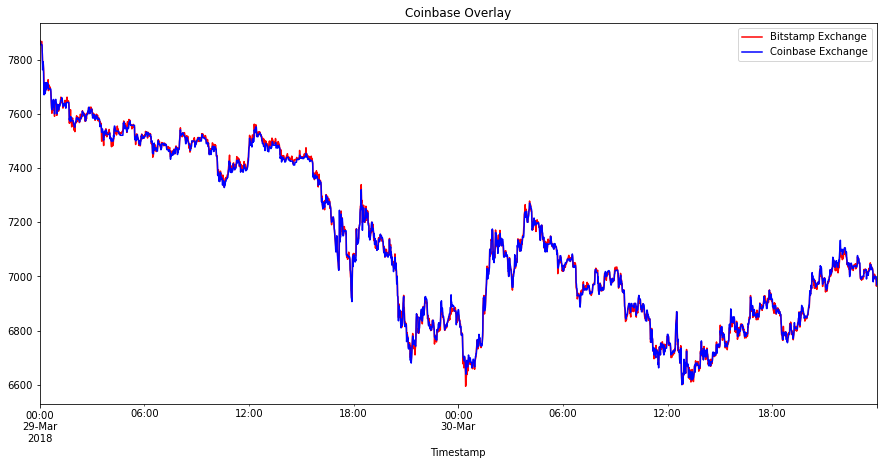

In [60]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc["2018-03-29":"2018-03-30"].plot(legend=True, figsize=(15, 7), title="Bitstamps and Coinbase Overlay 2018",color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc["2018-03-29":"2018-03-30"].plot(legend=True, figsize=(15, 7),title="Coinbase Overlay",color="blue", label="Coinbase Exchange")

In [61]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_spread_late = bitstamp_sliced['Close'].loc["2018-03-29":"2018-03-30"]
coinbase_spread_late = coinbase_sliced['Close'].loc["2018-03-29":"2018-03-30"]
arbitrage_spread_late = bitstamp_spread_late - coinbase_spread_late

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    2880.000000
mean        0.684052
std         9.719394
min       -89.900000
25%        -5.160000
50%         1.095000
75%         6.962500
max        45.600000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Analysis March 30 2018'}>

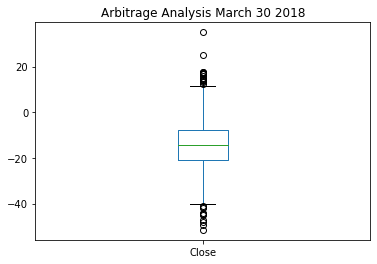

In [62]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late = coinbase_sliced['Close'].loc["2018-03-30"] - bitstamp_sliced['Close'].loc["2018-03-30"]
arbitrage_spread_middle.plot(kind="box",title="Arbitrage Analysis March 30 2018")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [63]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_spread_early - coinbase_spread_early
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early>0]


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()

count    4211.000000
mean      153.941605
std        97.356179
min         0.180000
25%        63.000000
50%       151.000000
75%       230.830000
max       439.010000
Name: Close, dtype: float64

In [65]:
arbitrage_spread_middle = bitstamp_spread_middle - coinbase_spread_middle
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]
arbitrage_spread_middle.describe()

count    2404.000000
mean       14.425616
std         8.849808
min         0.010000
25%         7.670000
50%        13.415000
75%        20.000000
max        51.550000
Name: Close, dtype: float64

In [66]:
arbitrage_spread_late = bitstamp_spread_late - coinbase_spread_late
arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late>0]
arbitrage_spread_late.describe()

count    1570.000000
mean        7.492000
std         5.687539
min         0.010000
25%         3.145000
50%         6.390000
75%        10.327500
max        45.600000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [67]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / coinbase_sliced["Close"].loc["2018-01-29"]

# Review the spread return DataFrame
spread_return_early.describe()

count    1379.000000
mean        0.011298
std         0.007512
min         0.000052
25%         0.003790
50%         0.013063
75%         0.018445
max         0.027075
Name: Close, dtype: float64

In [68]:
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase_sliced["Close"].loc["2018-02-27"]
spread_return_middle.describe()

count    1.324000e+03
mean     1.506679e-03
std      8.574217e-04
min      9.132303e-07
25%      8.516191e-04
50%      1.435753e-03
75%      2.038093e-03
max      4.863919e-03
Name: Close, dtype: float64

In [69]:
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / coinbase_sliced["Close"].loc["2018-03-30"]
spread_return_late.describe()

count    635.000000
mean       0.000901
std        0.000723
min        0.000001
25%        0.000356
50%        0.000720
75%        0.001278
max        0.004196
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [70]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

In [72]:
profitable_trades_middle = spread_return_middle[spread_return_middle>.01]
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [73]:
profitable_trades_late = spread_return_late[spread_return_late>.01]
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [74]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    742.000000
mean       0.017795
std        0.003142
min        0.010021
25%        0.015371
50%        0.018233
75%        0.020063
max        0.027075
Name: Close, dtype: float64

In [76]:
profitable_trades_middle.describe().dropna()

count    0.0
Name: Close, dtype: float64

In [77]:
profitable_trades_late.describe().dropna()

count    0.0
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [79]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profitable_trades_early * coinbase_sliced['Close'].loc["2018-01-29"]

# View the early profit DataFrame
profit_per_trade_early.to_frame().head()

Close
Timestamp                  
2018-01-29 00:00:00  201.98
2018-01-29 00:01:00  217.00
2018-01-29 00:02:00  217.22
2018-01-29 00:03:00  223.22
2018-01-29 00:04:00  208.64

In [80]:
profit_middle = profitable_trades_middle
profit_per_trade_middle = profitable_trades_middle * coinbase_sliced['Close'].loc["2018-02-27"].dropna()
profit_per_trade_middle.to_frame().head().dropna()

Empty DataFrame
Columns: [Close]
Index: []

In [85]:
profit_late = profitable_trades_late
profit_per_trade_late = profitable_trades_late * coinbase_sliced['Close'].loc["2018-03-30"].dropna()
profit_per_trade_late.to_frame().head().dropna()

Empty DataFrame
Columns: [Close]
Index: []

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [81]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.to_frame().describe()

Close
count  742.000000
mean   196.724070
std     34.604234
min    111.200000
25%    170.037500
50%    200.930000
75%    221.002500
max    300.270000

In [82]:
profit_per_trade_middle.to_frame().describe().dropna()

Close
count    0.0

In [86]:
profit_per_trade_late.to_frame().describe().dropna()

Close
count    0.0

<AxesSubplot:title={'center':'Profits for January 29 2018'}, xlabel='Timestamp'>

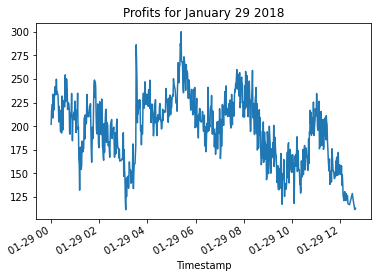

In [87]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early = profit_per_trade_early.dropna()
profit_per_trade_early.plot(title="Profits for January 29 2018")

<AxesSubplot:title={'center':'Profits for February 27 2018'}, xlabel='Timestamp'>

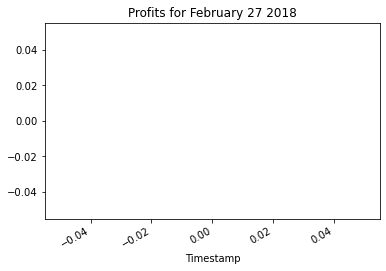

In [88]:
profit_per_trade_middle = profit_per_trade_middle.dropna()
profit_per_trade_middle.plot(title="Profits for February 27 2018")

<AxesSubplot:title={'center':'Profits for March 30 2018'}, xlabel='Timestamp'>

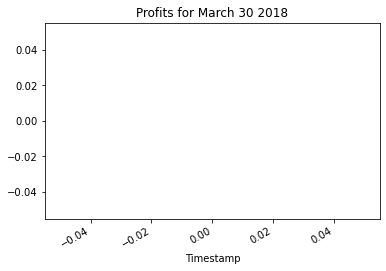

In [89]:
profit_per_trade_late = profit_per_trade_late.dropna()
profit_per_trade_late.plot(title="Profits for March 30 2018")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [90]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
print(profit_per_trade_early.sum())

145969.25999999995


In [91]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
print(profit_per_trade_middle.sum())

0.0


In [92]:
print(profit_per_trade_late.sum())

0.0


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [95]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

In [96]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()

In [97]:
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits for January 29 2018'}, xlabel='Timestamp'>

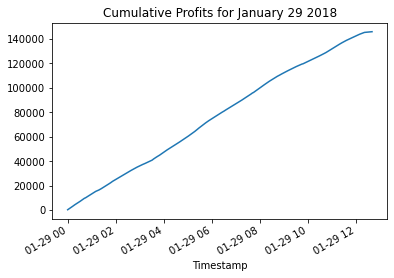

In [99]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title="Cumulative Profits for January 29 2018")

<AxesSubplot:title={'center':'Cumulative Profits for February 27 2018'}, xlabel='Timestamp'>

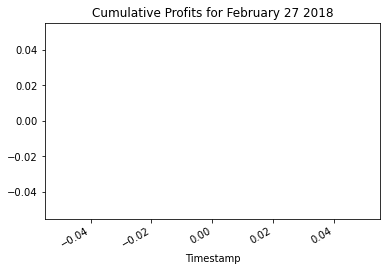

In [100]:
cumulative_profit_middle.plot(title="Cumulative Profits for February 27 2018")

In [ ]:
cumulative_profit_late.plot(title="Cumulative Profits for March 30 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE